In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Loading The Dataset**

In [140]:
df = pd.read_csv('Experiment1_modified(3-10).csv')
df

,Animal ID,Group,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),insulin range
0,1,ST,0,88,100,0.146,low
1,2,ST,0,102,78,0.172,low
2,3,ST,0,103,92,0.159,low
3,4,ST,0,104,44,0.228,low
4,5,ST,0,92,66,0.163,low
...,...,...,...,...,...,...,...
211,32,RN,120,107,27,0.528,low
212,33,RN,120,101,45,0.602,low
213,34,RN,120,112,28,0.370,low
214,35,RN,120,110,66,0.684,low


# **Feature Engineering**

In [141]:
df.describe()

,Animal ID,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
count,216.000000,216.000000,216.000000,216.000000,216.000000
mean,18.500000,52.500000,144.546296,60.879630,1.399329
std,10.412425,42.302895,32.312539,22.613319,1.518283
min,1.000000,0.000000,72.000000,8.000000,0.024000
25%,9.750000,15.000000,120.750000,44.000000,0.477250
50%,18.500000,45.000000,141.000000,59.500000,0.819000
75%,27.250000,90.000000,166.250000,75.250000,1.660000
max,36.000000,120.000000,229.000000,113.000000,9.573000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Animal ID              216 non-null    int64  
 1   Group                  216 non-null    object 
 2   Timepoint (min)        216 non-null    int64  
 3   Glucose (mg/dL)        216 non-null    int64  
 4   Triglycerides (mg/dL)  216 non-null    int64  
 5   Insulin (ng/mL)        216 non-null    float64
 6   insulin range          216 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.9+ KB


In [143]:
df.isnull().sum()

,0
Animal ID,0
Group,0
Timepoint (min),0
Glucose (mg/dL),0
Triglycerides (mg/dL),0
Insulin (ng/mL),0
insulin range,0


In [144]:
df.shape

(216, 7)

In [145]:
df = df.drop(columns=['Animal ID','Group','Timepoint (min)','insulin range'])
df

,Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
0,88,100,0.146
1,102,78,0.172
2,103,92,0.159
3,104,44,0.228
4,92,66,0.163
...,...,...,...
211,107,27,0.528
212,101,45,0.602
213,112,28,0.370
214,110,66,0.684


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

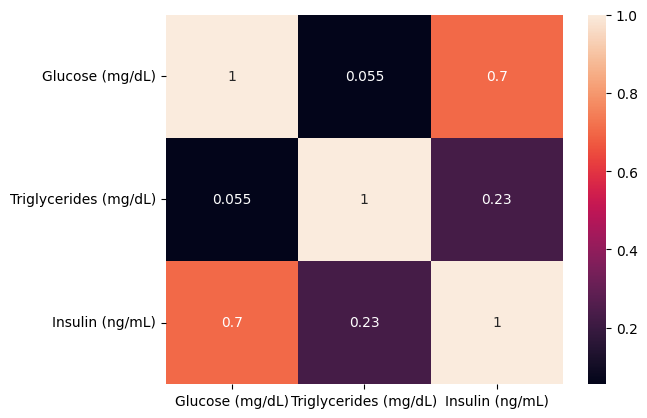

In [147]:
sns.heatmap(df.corr(),annot=True)

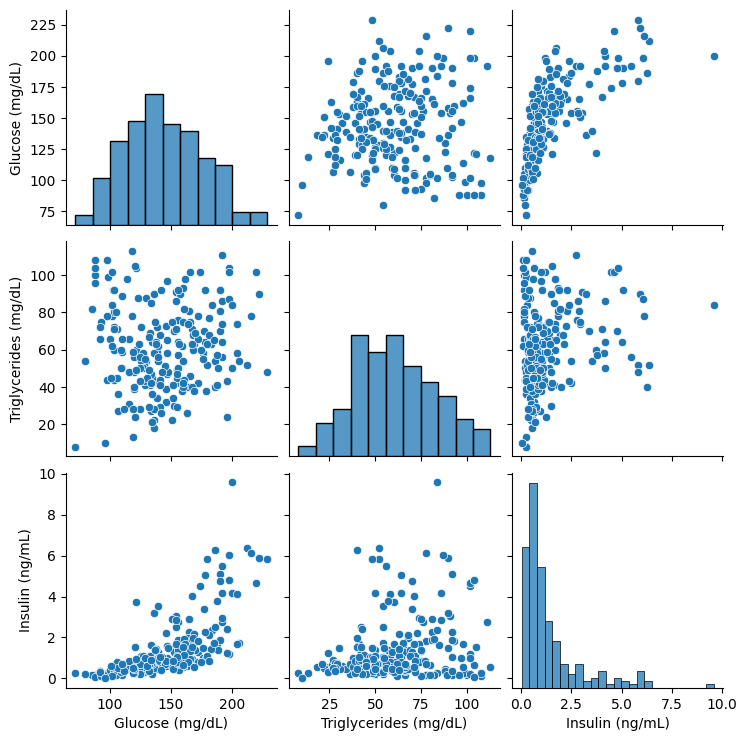

In [148]:
sns.pairplot(df)

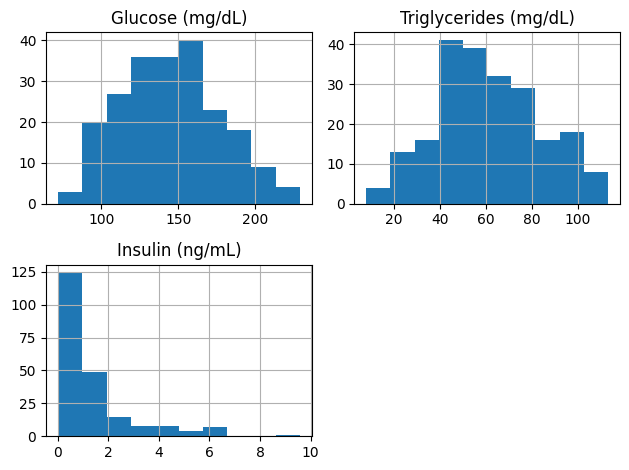

In [149]:
df.hist()
plt.tight_layout()

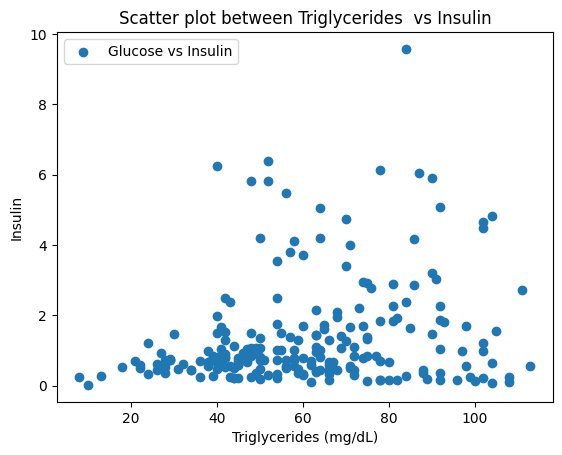

In [150]:
plt.scatter(df['Triglycerides (mg/dL)'],df['Insulin (ng/mL)'],label='Glucose vs Insulin')
plt.title("Scatter plot between Triglycerides  vs Insulin")
plt.xlabel("Triglycerides (mg/dL)")
plt.ylabel('Insulin')
plt.legend()
plt.show()

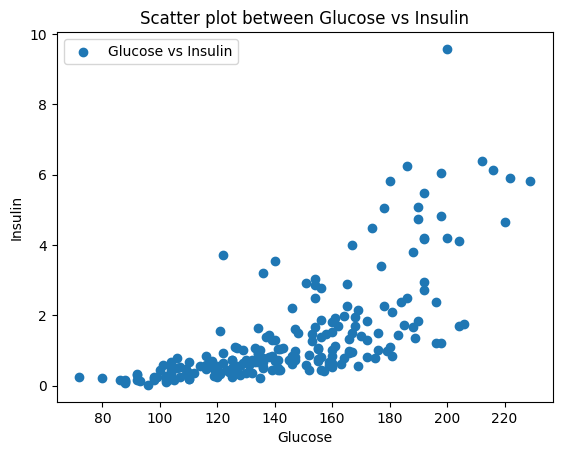

In [151]:
plt.scatter(df['Glucose (mg/dL)'],df['Insulin (ng/mL)'],label='Glucose vs Insulin')
plt.title("Scatter plot between Glucose vs Insulin")
plt.xlabel("Glucose")
plt.ylabel('Insulin')
plt.legend()
plt.show()

# **Cross Validation**

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x = df.drop(columns='Insulin (ng/mL)')
y = df['Insulin (ng/mL)']

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_val = ['Glucose (mg/dL)','Triglycerides (mg/dL)','Insulin (ng/mL)']
df[numerical_val] = scaler.fit_transform(df[numerical_val])
df


,Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
0,0.101911,0.876190,0.012776
1,0.191083,0.666667,0.015499
2,0.197452,0.800000,0.014138
3,0.203822,0.342857,0.021363
4,0.127389,0.552381,0.014556
...,...,...,...
211,0.222930,0.180952,0.052780
212,0.184713,0.352381,0.060530
213,0.254777,0.190476,0.036234
214,0.242038,0.552381,0.069117


In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
Lmodel = LinearRegression()
Lmodel.fit(x_train,y_train)

LinearRegression()

In [158]:
predict = Lmodel.predict(x_test)
predict

array([ 1.36142762,  2.22192981,  1.22914261,  0.36760082,  0.72989017,
        0.7010422 ,  1.87046928,  0.95738228,  1.26803976,  1.91482416,
        0.03771127,  0.42547006,  2.7021235 ,  0.74271154,  3.03634452,
        0.4147279 ,  2.3578533 ,  0.78793272,  3.3896243 ,  1.06878928,
        1.41487873,  0.26520339,  0.97280254, -0.05273108,  0.67288722,
        2.93671929,  2.07422454,  3.50553609,  2.74457248,  1.11574305,
        2.24999813,  3.95047113,  0.22621959,  1.95103577,  1.09399876,
        1.63864569,  1.75992857,  1.68300058,  2.24999813, -0.21403736,
        2.66504561,  0.85048006,  0.58582339,  0.69827   ])

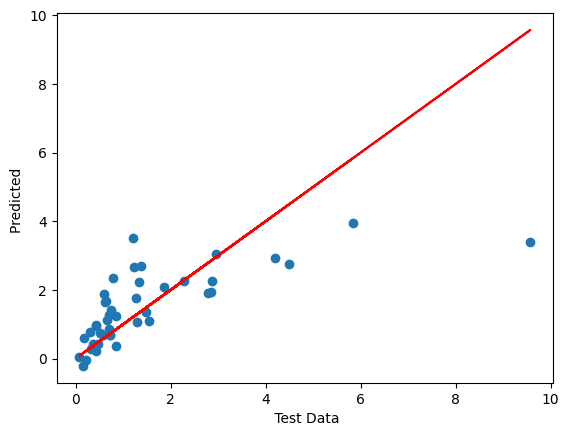

In [159]:
plt.scatter(y_test,predict)
plt.plot(y_test,y_test,'r')
plt.xlabel(' Test Data')
plt.ylabel('Predicted ')
plt.show()


In [160]:
from sklearn.metrics import mean_squared_error

In [161]:
mse = mean_squared_error(y_test,predict)
mse

1.5384741858890423

In [162]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [163]:
Rmodel = RandomForestRegressor(n_estimators=1000,random_state=42)
Rmodel.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [164]:
Predict = Rmodel.predict(x_test)
Predict

array([0.647991  , 1.534813  , 0.79637   , 0.365731  , 0.52988   ,
       0.63009503, 0.7270789 , 0.948813  , 1.232858  , 1.72133   ,
       0.146109  , 0.502114  , 3.468721  , 0.629197  , 3.486293  ,
       0.291622  , 1.472994  , 0.952447  , 4.123049  , 1.62554193,
       0.70374407, 0.457185  , 0.73978   , 0.498044  , 0.526753  ,
       4.2518    , 2.064235  , 4.608314  , 1.733026  , 2.366672  ,
       1.60602   , 5.308655  , 0.538456  , 2.41114   , 0.541875  ,
       0.98713547, 1.643187  , 1.36708119, 1.60602   , 0.312426  ,
       4.072382  , 0.65768043, 0.517146  , 0.68595213])

In [165]:
Mse = mean_squared_error(y_test,Predict)
Mse

1.6613252642455072

In [166]:
Amodel = AdaBoostRegressor(n_estimators=1000,random_state=42)
Amodel.fit(x_train,y_train)


AdaBoostRegressor(n_estimators=1000, random_state=42)

In [167]:
Apredict = Amodel.predict(x_test)
Apredict

array([1.21515054, 1.55680851, 1.21515054, 0.45368   , 0.45368   ,
       1.21515054, 1.28074074, 1.28074074, 1.28074074, 1.55680851,
       0.242     , 0.428375  , 3.64248   , 1.28074074, 3.0567963 ,
       0.45368   , 1.5917    , 1.21515054, 3.72506452, 1.28074074,
       1.28074074, 0.45368   , 1.21515054, 0.428375  , 1.1620339 ,
       3.35323529, 1.5917    , 3.72506452, 1.95260241, 1.95260241,
       1.55680851, 3.72506452, 0.428375  , 1.55680851, 0.45368   ,
       1.28074074, 1.28074074, 1.28074074, 1.55680851, 0.242     ,
       3.35323529, 1.21515054, 0.45368   , 1.1620339 ])

In [168]:
aMSE = mean_squared_error(y_test,Apredict)
aMSE

1.7542819305247486

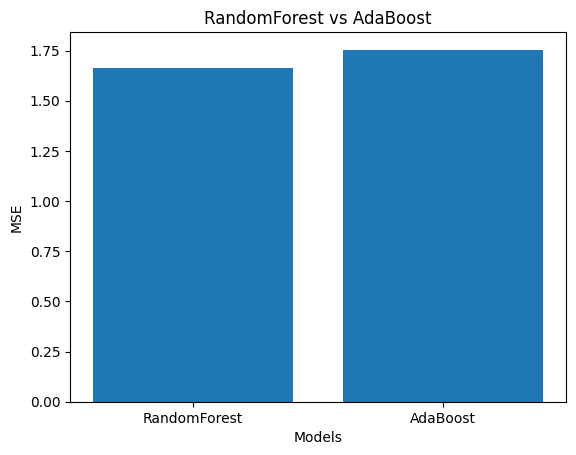

In [169]:
score = [Mse,aMSE]
Models = ["RandomForest","AdaBoost"]
plt.bar(Models,score)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("RandomForest vs AdaBoost")
plt.show()

In [170]:
Rrmse = np.sqrt(Mse)
Armse = np.sqrt(aMSE)

In [171]:
Rrmse

1.2889240723353363

In [172]:
Armse

1.3244930843627492